In [ ]:
import pandas as pd
df = pd.read_excel("hepsiemlaklink.xlsx")
df.head(10)

,Link
0,https://www.hepsiemlak.com/eskisehir-tepebasi-...
1,https://www.hepsiemlak.com/eskisehir-odunpazar...
2,https://www.hepsiemlak.com/eskisehir-tepebasi-...
3,https://www.hepsiemlak.com/eskisehir-tepebasi-...
4,https://www.hepsiemlak.com/eskisehir-tepebasi-...
5,https://www.hepsiemlak.com/eskisehir-tepebasi-...
6,https://www.hepsiemlak.com/eskisehir-tepebasi-...
7,https://www.hepsiemlak.com/eskisehir-odunpazar...
8,https://www.hepsiemlak.com/eskisehir-tepebasi-...
9,https://www.hepsiemlak.com/eskisehir-odunpazar...


In [ ]:
import pandas as pd
import asyncio
from playwright.async_api import async_playwright

df = pd.read_excel('hepsiemlaklink.xlsx')
newlist = []
async def extract_val_attributes(myurl,counter):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        await page.goto(myurl)
        await asyncio.sleep(5)


        desired_fields = [
            "Son Güncelleme Tarihi", "Konut Tipi", "Oda + Salon Sayısı",
            "Banyo Sayısı", "Brüt M2", "Kat Sayısı", "Bulunduğu Kat",
            "Bina Yaşı", "Isınma Tipi", "Eşya Durumu", "Kullanım Durumu", "Cephe"
        ]


        data = await page.evaluate(f'''() => {{
            const items = document.querySelectorAll("li.spec-item");
            const fieldValues = Array.from(items)
                .map(item => {{
                    const field = item.querySelector("span.txt")?.textContent.trim();
                    const valueElement = item.querySelector("span:not(.txt), a");
                    const value = valueElement?.textContent.trim();
                    return {{ field, value }};
                }})
                .filter(item => item.field && {desired_fields}?.includes(item.field));

            // Extract price value
            const priceElement = document.querySelector("p.fz24-text.price");
            const price = priceElement?.textContent.trim();

            // Extract title value
            const titleElement = document.querySelector("h1.fontRB");
            const title = titleElement?.textContent.trim();

            return {{ fieldValues, price, title }};
        }}''')


        newlist.append(data)

        print(f"Counter: {counter}, Extracted data: {data}")

In [ ]:
import pandas as pd

df = pd.read_excel("merged_data.xlsx")
df

,fieldValues,price,title,Lokasyon
0,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",12.500 TL,CONKER INSAAT EMLAK’TAN ERTUGRULGAZI MAHALLESI...,Eskişehir / Tepebaşı / Ertuğrulgazi Mah.
1,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",16.000 TL,SAHIBINDEN CARSAMBA PAZARI BASINDA 3+1 BAKIMLI...,Eskişehir / Odunpazarı / Akarbaşı Mah.
2,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",9.000 TL,ILETISIM KAPISI YAKINI 2 ODA ANTRE MUTFAKLI AP...,Eskişehir / Tepebaşı / Şirintepe Mah.
3,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",13.000 TL,SIRINTEPE MAHALLESI SEMT PAZARI YAKINI ARAKAT ...,Eskişehir / Tepebaşı / Şirintepe Mah.
4,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",10.000 TL,SUTLUCE MAHALLESI ZIYA GOKALP OKULU YAKINI KIR...,Eskişehir / Tepebaşı / Sütlüce Mah.
...,...,...,...,...
1369,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",9.000 TL,SIRINTEPE MAHALLESI ECZACILIK YAKINI ESYALI KI...,Eskişehir / Tepebaşı / Şirintepe Mah.
1370,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",13.250 TL,BUYUKDERE MAHALLESI KIRALIK 1+1 DUBLEKS,Eskişehir / Odunpazarı / Büyükdere Mah.
1371,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",9.000 TL,SUTLUCE'DE GENIS ESYALI KIRALIK 1+1,Eskişehir / Tepebaşı / Sütlüce Mah.
1372,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",10.000 TL,ERTUGRULGAZI MH 1+1 ESYALI KIRALIK APART DAIRE,Eskişehir / Tepebaşı / Ertuğrulgazi Mah.


In [ ]:
df[['İl', 'İlçe', 'Mahalle']] = df['Lokasyon'].str.split(' / ', expand=True)
df.drop('Lokasyon', axis=1, inplace=True)

df.head()

,fieldValues,price,title,İl,İlçe,Mahalle
0,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",12.500 TL,CONKER INSAAT EMLAK’TAN ERTUGRULGAZI MAHALLESI...,Eskişehir,Tepebaşı,Ertuğrulgazi Mah.
1,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",16.000 TL,SAHIBINDEN CARSAMBA PAZARI BASINDA 3+1 BAKIMLI...,Eskişehir,Odunpazarı,Akarbaşı Mah.
2,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",9.000 TL,ILETISIM KAPISI YAKINI 2 ODA ANTRE MUTFAKLI AP...,Eskişehir,Tepebaşı,Şirintepe Mah.
3,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",13.000 TL,SIRINTEPE MAHALLESI SEMT PAZARI YAKINI ARAKAT ...,Eskişehir,Tepebaşı,Şirintepe Mah.
4,"[{'field': 'Son Güncelleme Tarihi', 'value': '...",10.000 TL,SUTLUCE MAHALLESI ZIYA GOKALP OKULU YAKINI KIR...,Eskişehir,Tepebaşı,Sütlüce Mah.


In [ ]:
split_data = df['fieldValues'].str.split('}, {', expand=True)
split_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,"[{'field': 'Son Güncelleme Tarihi', 'value': '...","'field': 'Konut Tipi', 'value': 'Daire'","'field': 'Oda + Salon Sayısı', 'value': '2 + 1'","'field': 'Banyo Sayısı', 'value': '1'","'field': 'Brüt / Net M2', 'value': '130 m2'","'field': 'Kat Sayısı', 'value': '2 Katlı'","'field': 'Bulunduğu Kat', 'value': '2. Kat'","'field': 'Bina Yaşı', 'value': '15 Yaşında'","'field': 'Isınma Tipi', 'value': 'Kombi'","'field': 'Eşya Durumu', 'value': 'Eşyalı Değil'","'field': 'Kullanım Durumu', 'value': 'Boş'","'field': 'Cephe', 'value': 'Doğu, Batı'}]"
1,"[{'field': 'Son Güncelleme Tarihi', 'value': '...","'field': 'Konut Tipi', 'value': 'Daire'","'field': 'Oda + Salon Sayısı', 'value': '3 + 1'","'field': 'Banyo Sayısı', 'value': '2'","'field': 'Brüt / Net M2', 'value': '130 m2'","'field': 'Kat Sayısı', 'value': '4 Katlı'","'field': 'Bulunduğu Kat', 'value': 'Ara Kat'","'field': 'Bina Yaşı', 'value': '35 Yaşında'","'field': 'Isınma Tipi', 'value': 'Merkezi'","'field': 'Eşya Durumu', 'value': 'Eşyalı Değil'","'field': 'Kullanım Durumu', 'value': 'Boş'","'field': 'Cephe', 'value': 'Güney, Doğu'}]"
2,"[{'field': 'Son Güncelleme Tarihi', 'value': '...","'field': 'Konut Tipi', 'value': 'Daire'","'field': 'Oda + Salon Sayısı', 'value': '1 + 1'","'field': 'Banyo Sayısı', 'value': '1'","'field': 'Brüt / Net M2', 'value': '60 m2'","'field': 'Kat Sayısı', 'value': '3 Katlı'","'field': 'Bulunduğu Kat', 'value': '1. Kat'","'field': 'Bina Yaşı', 'value': '5 Yaşında'","'field': 'Isınma Tipi', 'value': 'Kombi'","'field': 'Eşya Durumu', 'value': 'Eşyalı Değil'","'field': 'Kullanım Durumu', 'value': 'Boş'}]",None
3,"[{'field': 'Son Güncelleme Tarihi', 'value': '...","'field': 'Konut Tipi', 'value': 'Daire'","'field': 'Oda + Salon Sayısı', 'value': '2 + 1'","'field': 'Banyo Sayısı', 'value': '1'","'field': 'Brüt / Net M2', 'value': '120 m2'","'field': 'Kat Sayısı', 'value': '3 Katlı'","'field': 'Bulunduğu Kat', 'value': '2. Kat'","'field': 'Bina Yaşı', 'value': '16 Yaşında'","'field': 'Isınma Tipi', 'value': 'Kombi'","'field': 'Kullanım Durumu', 'value': 'Boş'}]",None,None
4,"[{'field': 'Son Güncelleme Tarihi', 'value': '...","'field': 'Konut Tipi', 'value': 'Daire'","'field': 'Oda + Salon Sayısı', 'value': '1 + 1'","'field': 'Banyo Sayısı', 'value': '1'","'field': 'Brüt / Net M2', 'value': '50 m2'","'field': 'Kat Sayısı', 'value': '3 Katlı'","'field': 'Bulunduğu Kat', 'value': '3. Kat'","'field': 'Bina Yaşı', 'value': '4 Yaşında'","'field': 'Isınma Tipi', 'value': 'Kombi'","'field': 'Eşya Durumu', 'value': 'Eşyalı Değil'","'field': 'Kullanım Durumu', 'value': 'Boş'}]",None


In [ ]:
df["fieldValues"][0]

"[{'field': 'Son Güncelleme Tarihi', 'value': '05-12-2024'}, {'field': 'Konut Tipi', 'value': 'Daire'}, {'field': 'Oda + Salon Sayısı', 'value': '2 + 1'}, {'field': 'Banyo Sayısı', 'value': '1'}, {'field': 'Brüt / Net M2', 'value': '130 m2'}, {'field': 'Kat Sayısı', 'value': '2 Katlı'}, {'field': 'Bulunduğu Kat', 'value': '2. Kat'}, {'field': 'Bina Yaşı', 'value': '15 Yaşında'}, {'field': 'Isınma Tipi', 'value': 'Kombi'}, {'field': 'Eşya Durumu', 'value': 'Eşyalı Değil'}, {'field': 'Kullanım Durumu', 'value': 'Boş'}, {'field': 'Cephe', 'value': 'Doğu, Batı'}]"

In [ ]:
for col in split_data.columns:
    split_data[col] = split_data[col].str.extract(r"'value': (.+)")
    split_data[col] = split_data[col].str.replace("'", "")
    split_data[col] = split_data[col].str.replace('"', '')
    split_data[col] = split_data[col].str.replace("=", "")
    split_data[col] = split_data[col].str.replace("[", "")
    split_data[col] = split_data[col].str.replace("]", "")
    split_data[col] = split_data[col].str.replace("}", "")
    split_data[col] = split_data[col].str.replace("{", "")
split_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,05-12-2024,Daire,2 + 1,1,130 m2,2 Katlı,2. Kat,15 Yaşında,Kombi,Eşyalı Değil,Boş,"Doğu, Batı"
1,31-10-2024,Daire,3 + 1,2,130 m2,4 Katlı,Ara Kat,35 Yaşında,Merkezi,Eşyalı Değil,Boş,"Güney, Doğu"
2,05-12-2024,Daire,1 + 1,1,60 m2,3 Katlı,1. Kat,5 Yaşında,Kombi,Eşyalı Değil,Boş,NaN
3,05-12-2024,Daire,2 + 1,1,120 m2,3 Katlı,2. Kat,16 Yaşında,Kombi,Boş,NaN,NaN
4,05-12-2024,Daire,1 + 1,1,50 m2,3 Katlı,3. Kat,4 Yaşında,Kombi,Eşyalı Değil,Boş,NaN


In [ ]:
split_data.columns = [
            "Son Güncelleme Tarihi", "Konut Tipi", "Oda + Salon Sayısı",
            "Banyo Sayısı", "Brüt M2", "Kat Sayısı", "Bulunduğu Kat",
            "Bina Yaşı", "Isınma Tipi", "Eşya Durumu", "Kullanım Durumu", "Cephe"
        ]
split_data.head()

,Son Güncelleme Tarihi,Konut Tipi,Oda + Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Eşya Durumu,Kullanım Durumu,Cephe
0,05-12-2024,Daire,2 + 1,1,130 m2,2 Katlı,2. Kat,15 Yaşında,Kombi,Eşyalı Değil,Boş,"Doğu, Batı"
1,31-10-2024,Daire,3 + 1,2,130 m2,4 Katlı,Ara Kat,35 Yaşında,Merkezi,Eşyalı Değil,Boş,"Güney, Doğu"
2,05-12-2024,Daire,1 + 1,1,60 m2,3 Katlı,1. Kat,5 Yaşında,Kombi,Eşyalı Değil,Boş,NaN
3,05-12-2024,Daire,2 + 1,1,120 m2,3 Katlı,2. Kat,16 Yaşında,Kombi,Boş,NaN,NaN
4,05-12-2024,Daire,1 + 1,1,50 m2,3 Katlı,3. Kat,4 Yaşında,Kombi,Eşyalı Değil,Boş,NaN


In [ ]:
object_columns =  split_data.select_dtypes(include=['object']).columns

for col in object_columns:
  print(f"Domains for column '{col}':")
  print(split_data[col].unique())
  print("-" * 20)

Domains for column 'Son Güncelleme Tarihi':
['05-12-2024' '31-10-2024' '04-12-2024' '03-12-2024' '02-12-2024'
 '30-11-2024' '29-11-2024' '01-12-2024' '28-11-2024' '26-11-2024'
 '22-11-2024' '16-11-2024' '25-11-2024' '09-11-2024' '08-11-2024'
 '15-11-2024' '20-11-2024' '23-11-2024' '13-11-2024' '24-11-2024'
 '11-11-2024' '21-11-2024' '27-11-2024' '14-11-2024' '19-11-2024'
 '18-11-2024' '12-11-2024' '06-11-2024' '27-10-2024' '25-10-2024'
 '12-10-2024' '11-10-2024' '15-10-2024' '29-10-2024' '18-10-2024'
 '04-11-2024' '19-10-2024' '05-11-2024' '22-10-2024' '30-10-2024'
 '10-10-2024' '20-10-2024' '07-10-2024' '23-10-2024' '28-10-2024'
 '26-10-2024' '02-11-2024' '16-10-2024' nan '24-10-2024' '07-11-2024'
 '17-11-2024' '30-09-2024' '22-09-2024' '17-09-2024' '21-10-2024'
 '01-11-2024' '10-11-2024' '27-09-2024' '07-09-2024' '17-10-2024'
 '13-10-2024' '23-09-2024' '09-10-2024' '04-10-2024' '14-10-2024'
 '01-10-2024' '03-11-2024' '06-10-2024' '14-09-2024' '25-09-2024'
 '11-09-2024' '20-09-2024' '

In [ ]:
valid_cephe_values = ['Doğu, Batı','Güney, Doğu','Kuzey, Güney, Batı', 'Kuzey, Doğu, Batı',
                      'Kuzey, Doğu' ,'Güney, Doğu, Batı' ,'Kuzey, Batı', 'Kuzey, Güney, Doğu',
                      'Güney, Batı', 'Güney', 'Batı' ,'Doğu' ,'Kuzey, Güney' ,'Kuzey',
                      'Kuzey, Güney, Doğu, Batı']

for index, row in split_data.iterrows():
    if row['Kullanım Durumu'] in valid_cephe_values:
        split_data.loc[index, 'Cephe'] = row['Kullanım Durumu']
        split_data.loc[index, 'Kullanım Durumu'] = None
    if row['Eşya Durumu'] in valid_cephe_values:
        split_data.loc[index, 'Cephe'] = row['Eşya Durumu']
        split_data.loc[index, 'Eşya Durumu'] = None

valid_kullanim_values = ['Boş','Mülk Sahibi','Kiracılı']

for index, row in split_data.iterrows():
    if row["Eşya Durumu"] in valid_kullanim_values:
        split_data.loc[index, "Kullanım Durumu"] = row["Eşya Durumu"]
        split_data.loc[index, "Eşya Durumu"] = None
    if row['Isınma Tipi'] in valid_kullanim_values:
        split_data.loc[index, "Kullanım Durumu"] = row['Isınma Tipi']
        split_data.loc[index, 'Isınma Tipi'] = None

valid_esya_values = ['Eşyalı Değil','Eşyalı']

for index, row in split_data.iterrows():
    if row['Isınma Tipi'] in valid_esya_values:
        split_data.loc[index, 'Eşya Durumu'] = row['Isınma Tipi']
        split_data.loc[index, 'Isınma Tipi'] = None

valid_isitma_values = ['Kombi','Merkezi','Yerden Isıtma','Merkezi (Pay Ölçer)','Kat Kaloriferi', 'Klima','Soba','Isıtma Yok']

for index, row in split_data.iterrows():
    if row['Bina Yaşı'] in valid_isitma_values:
        split_data.loc[index, 'Isınma Tipi'] = row['Bina Yaşı']
        split_data.loc[index, 'Bina Yaşı'] = None

valid_yas_values = ['15 Yaşında','35 Yaşında','5 Yaşında','16 Yaşında','4 Yaşında',
                    '11 Yaşında','7 Yaşında','3 Yaşında','25 Yaşında','Sıfır Bina',
                    '20 Yaşında','6 Yaşında','13 Yaşında','8 Yaşında','14 Yaşında',
                    '40 Yaşında','2 Yaşında','26 Yaşında','27 Yaşında','24 Yaşında',
                    '10 Yaşında','12 Yaşında','9 Yaşında','28 Yaşında','29 Yaşında',
                    '130 Yaşında','30 Yaşında','17 Yaşında','1 Yaşında','32 Yaşında',
                    '18 Yaşında','21 Yaşında','31 Yaşında','22 Yaşında','33 Yaşında',
                    '19 Yaşında' ,'34 Yaşında' ,'39 Yaşında','23 Yaşında','50 Yaşında','45 Yaşında']

for index, row in split_data.iterrows():
    if row['Bulunduğu Kat'] in valid_yas_values:
        split_data.loc[index, 'Bina Yaşı'] = row['Bulunduğu Kat']
        split_data.loc[index, 'Bulunduğu Kat'] = None

valid_kat_values = ['2. Kat', 'Ara Kat', '1. Kat', '3. Kat', '7. Kat', '5. Kat', '4. Kat', 'Zemin'
                    '8. Kat', 'Yüksek Giriş', '9. Kat', '6. Kat', 'Bahçe Katı', 'En Üst Kat',
                    'Kot 1', 'Kot 3', 'Giriş Katı', 'Kot 2', 'Çatı Katı', 'Teras Katı',
                    '17. Kat', 'Villa Katı', 'Bodrum']

for index, row in split_data.iterrows():
    if row['Kat Sayısı'] in valid_kat_values:
        split_data.loc[index, 'Bulunduğu Kat'] = row['Kat Sayısı']
        split_data.loc[index, 'Kat Sayısı'] = None

valid_katli_values = ['2 Katlı','4 Katlı','3 Katlı','9 Katlı','7 Katlı','5 Katlı','1 Katlı',
                      '12 Katlı','10 Katlı','6 Katlı','8 Katlı','11 Katlı','18 Katlı',
                      '13 Katlı','33 Katlı']

for index, row in split_data.iterrows():
    if row['Brüt M2'] in valid_katli_values:
        split_data.loc[index, 'Kat Sayısı'] = row['Brüt M2']
        split_data.loc[index, 'Brüt M2'] = None

valid_m2_values = ['100 m2','125 m2','160 m2','135 m2','50 m2','95 m2','110 m2',
                    '90 m2','55 m2','65 m2','130 m2','88 m2','54 m2','85 m2','70 m2']

for index, row in split_data.iterrows():
    if row['Banyo Sayısı'] in valid_m2_values:
        split_data.loc[index, 'Brüt M2'] = row['Banyo Sayısı']
        split_data.loc[index, 'Banyo Sayısı'] = None

In [ ]:
for col in split_data.columns:
    split_data[col] = split_data[col].replace(['nan', 'Belirtilmemiş', '1 + 109'], None)

split_data.head()

,Son Güncelleme Tarihi,Konut Tipi,Oda + Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Eşya Durumu,Kullanım Durumu,Cephe
0,05-12-2024,Daire,2 + 1,1,130 m2,2 Katlı,2. Kat,15 Yaşında,Kombi,Eşyalı Değil,Boş,"Doğu, Batı"
1,31-10-2024,Daire,3 + 1,2,130 m2,4 Katlı,Ara Kat,35 Yaşında,Merkezi,Eşyalı Değil,Boş,"Güney, Doğu"
2,05-12-2024,Daire,1 + 1,1,60 m2,3 Katlı,1. Kat,5 Yaşında,Kombi,Eşyalı Değil,Boş,NaN
3,05-12-2024,Daire,2 + 1,1,120 m2,3 Katlı,2. Kat,16 Yaşında,Kombi,None,Boş,NaN
4,05-12-2024,Daire,1 + 1,1,50 m2,3 Katlı,3. Kat,4 Yaşında,Kombi,Eşyalı Değil,Boş,NaN


In [ ]:
split_data["Brüt M2"] = split_data["Brüt M2"].str.replace(" m2", "")
split_data["Kat Sayısı"] = split_data["Kat Sayısı"].str.replace(" Katlı", "")
split_data["Bulunduğu Kat"] = split_data["Bulunduğu Kat"].str.replace(". Kat", "")
split_data["Bina Yaşı"] = split_data["Bina Yaşı"].str.replace(" Yaşında", "")

split_data.loc[split_data["Konut Tipi"] != "Daire", "Konut Tipi"] = "Others"
split_data.loc[split_data["Isınma Tipi"] == "Merkezi (Pay Ölçer)", "Isınma Tipi"] = "Merkezi"
split_data.loc[~split_data["Isınma Tipi"].isin(["Kombi", "Merkezi"]), "Isınma Tipi"] = "Others"
split_data.loc[split_data["Kullanım Durumu"] != "Boş", "Kullanım Durumu"] = "Dolu"

split_data.loc[split_data["Eşya Durumu"] == "Eşyalı Değil", "Eşya Durumu"] = 0
split_data.loc[split_data["Eşya Durumu"] == "Eşyalı", "Eşya Durumu"] = 1

split_data.loc[split_data["Kullanım Durumu"] == "Dolu", "Kullanım Durumu"] = 1
split_data.loc[split_data["Kullanım Durumu"] == "Boş", "Kullanım Durumu"] = 0

merged_df = pd.concat([split_data, df.iloc[:, [1, 4, 5]]], axis=1)
merged_df["price"] = merged_df["price"].astype(str).str.replace(" TL", "")
merged_df["price"] = merged_df["price"].astype(str).str.replace(".", "")

oda_salon = merged_df['Oda + Salon Sayısı'].str.split("+", expand=True)
merged_df['Oda Sayısı'] = oda_salon[0]
merged_df['Salon Sayısı'] = oda_salon[1]
merged_df = merged_df.drop('Oda + Salon Sayısı', axis=1)


split_data.head()

,Son Güncelleme Tarihi,Konut Tipi,Oda + Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Eşya Durumu,Kullanım Durumu,Cephe
0,05-12-2024,Daire,2 + 1,1,130,2,2,15,Kombi,Eşyalı Değil,Boş,"Doğu, Batı"
1,31-10-2024,Daire,3 + 1,2,130,4,Ara Kat,35,Merkezi,Eşyalı Değil,Boş,"Güney, Doğu"
2,05-12-2024,Daire,1 + 1,1,60,3,1,5,Kombi,Eşyalı Değil,Boş,NaN
3,05-12-2024,Daire,2 + 1,1,120,3,2,16,Kombi,None,Boş,NaN
4,05-12-2024,Daire,1 + 1,1,50,3,3,4,Kombi,Eşyalı Değil,Boş,NaN


In [ ]:
split_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Son Güncelleme Tarihi  1373 non-null   object
 1   Konut Tipi             1373 non-null   object
 2   Oda + Salon Sayısı     1372 non-null   object
 3   Banyo Sayısı           1354 non-null   object
 4   Brüt M2                1373 non-null   object
 5   Kat Sayısı             1373 non-null   object
 6   Bulunduğu Kat          1368 non-null   object
 7   Bina Yaşı              1373 non-null   object
 8   Isınma Tipi            1373 non-null   object
 9   Eşya Durumu            1240 non-null   object
 10  Kullanım Durumu        1194 non-null   object
 11  Cephe                  967 non-null    object
dtypes: object(12)
memory usage: 128.9+ KB


In [ ]:
split_data["Banyo Sayısı"] = pd.to_numeric(split_data["Banyo Sayısı"], errors='coerce').astype('Int64')
split_data["Brüt M2"] = pd.to_numeric(split_data["Brüt M2"], errors='coerce').astype('Int64')
split_data["Kat Sayısı"] = pd.to_numeric(split_data["Kat Sayısı"], errors='coerce').astype('Int64')
split_data["Bina Yaşı"] = pd.to_numeric(split_data["Bina Yaşı"], errors='coerce').astype('Int64')
split_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Son Güncelleme Tarihi  1373 non-null   object
 1   Konut Tipi             1373 non-null   object
 2   Oda + Salon Sayısı     1372 non-null   object
 3   Banyo Sayısı           1354 non-null   Int64 
 4   Brüt M2                1373 non-null   Int64 
 5   Kat Sayısı             1373 non-null   Int64 
 6   Bulunduğu Kat          1368 non-null   object
 7   Bina Yaşı              1252 non-null   Int64 
 8   Isınma Tipi            1373 non-null   object
 9   Eşya Durumu            1240 non-null   object
 10  Kullanım Durumu        1194 non-null   object
 11  Cephe                  967 non-null    object
dtypes: Int64(4), object(8)
memory usage: 134.3+ KB


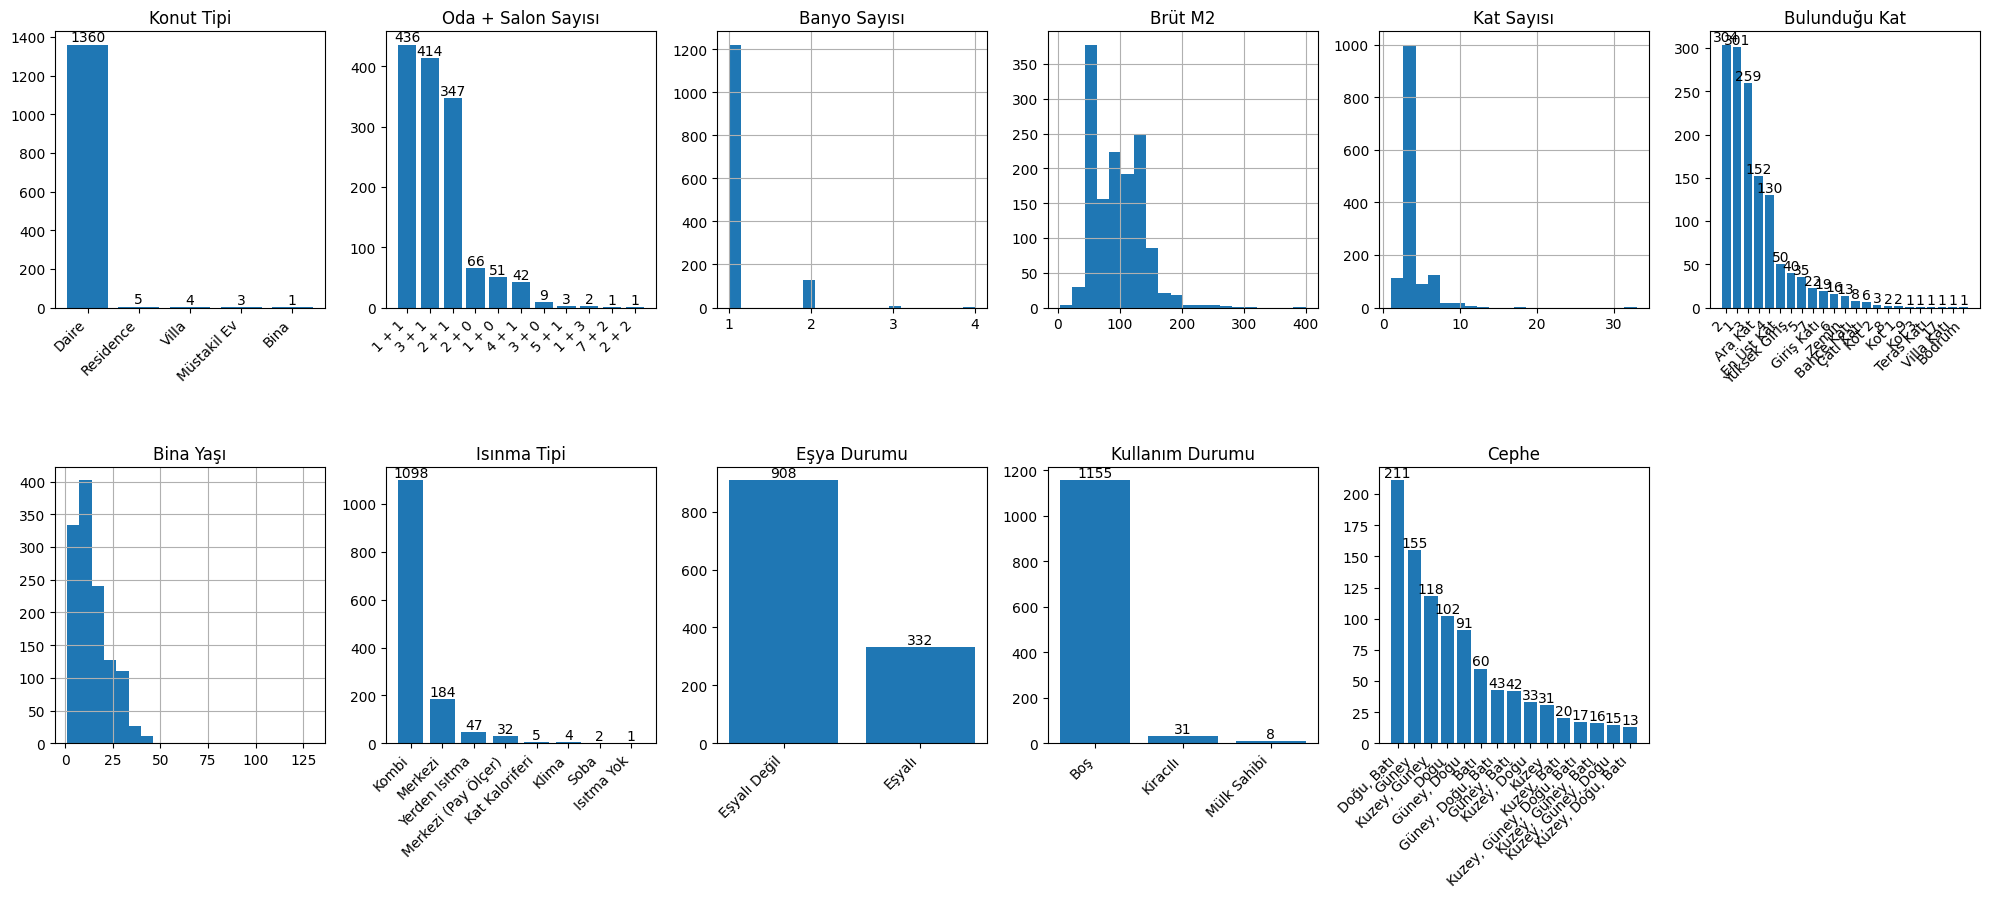

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 12))

for i, col in enumerate(split_data.columns[1:]):
    plt.subplot(3, 6, i + 1)
    if pd.api.types.is_numeric_dtype(split_data[col]):
        split_data[col].hist(bins=20)
        plt.title(col)
    else:
        value_counts = split_data[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.xticks(rotation=45, ha="right")
        plt.title(col)

        for j, v in enumerate(value_counts.values):
            plt.text(j, v, str(v), ha='center', va='bottom')
    plt.tight_layout()

plt.show()

In [ ]:
split_data.loc[split_data["Konut Tipi"] != "Daire", "Konut Tipi"] = "Others"
split_data.loc[split_data["Isınma Tipi"] == "Merkezi (Pay Ölçer)", "Isınma Tipi"] = "Merkezi"
split_data.loc[~split_data["Isınma Tipi"].isin(["Kombi", "Merkezi"]), "Isınma Tipi"] = "Others"
split_data.loc[split_data["Kullanım Durumu"] != "Boş", "Kullanım Durumu"] = "Dolu"

In [ ]:
split_data["Doğu"] = 0
split_data["Batı"] = 0
split_data["Kuzey"] = 0
split_data["Güney"] = 0

# Iterate through the rows and update the columns based on the "Cephe" values
for index, row in split_data.iterrows():
    cephe = str(row["Cephe"])  # Convert to string to handle potential NaN values
    if "Doğu" in cephe:
        split_data.loc[index, "Doğu"] = 1
    if "Batı" in cephe:
        split_data.loc[index, "Batı"] = 1
    if "Kuzey" in cephe:
        split_data.loc[index, "Kuzey"] = 1
    if "Güney" in cephe:
        split_data.loc[index, "Güney"] = 1

split_data = split_data.drop("Cephe", axis=1)

In [ ]:
def categorize_floor(row):
    floor = row['Bulunduğu Kat']
    if floor == 'Ara Kat':
        return None
    elif floor in ['Zemin','Yüksek Giriş','Bahçe Katı','Kot 1','Giriş Katı','Villa Katı']:
        return 0
    elif floor == 'Kot 3':
        return 2
    elif floor == 'Kot 2':
        return 1
    elif floor in ['En Üst Kat', 'Çatı Katı','Teras Katı']:
        return int(row['Kat Sayısı'])
    elif floor == 'Bodrum':
        return -1
    else:
        return floor

split_data['Bulunduğu Kat'] = split_data.apply(categorize_floor, axis=1)
split_data["Bulunduğu Kat"] = pd.to_numeric(split_data["Bulunduğu Kat"], errors='coerce').astype('Int64')

In [ ]:
split_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Son Güncelleme Tarihi  1373 non-null   object
 1   Konut Tipi             1374 non-null   object
 2   Oda + Salon Sayısı     1372 non-null   object
 3   Banyo Sayısı           1354 non-null   Int64 
 4   Brüt M2                1373 non-null   Int64 
 5   Kat Sayısı             1373 non-null   Int64 
 6   Bulunduğu Kat          1216 non-null   Int64 
 7   Bina Yaşı              1252 non-null   Int64 
 8   Isınma Tipi            1374 non-null   object
 9   Eşya Durumu            1240 non-null   object
 10  Kullanım Durumu        1374 non-null   object
 11  Doğu                   1374 non-null   int64 
 12  Batı                   1374 non-null   int64 
 13  Kuzey                  1374 non-null   int64 
 14  Güney                  1374 non-null   int64 
dtypes: Int64(5), int64(4)

In [ ]:
split_data.loc[split_data["Eşya Durumu"] == "Eşyalı Değil", "Eşya Durumu"] = 0
split_data.loc[split_data["Eşya Durumu"] == "Eşyalı", "Eşya Durumu"] = 1
split_data["Eşya Durumu"] = pd.to_numeric(split_data["Eşya Durumu"], errors='coerce').astype('Int64')

split_data.loc[split_data["Kullanım Durumu"] == "Dolu", "Kullanım Durumu"] = 1
split_data.loc[split_data["Kullanım Durumu"] == "Boş", "Kullanım Durumu"] = 0
split_data["Kullanım Durumu"] = pd.to_numeric(split_data["Kullanım Durumu"], errors='coerce').astype('Int64')

In [ ]:
merged_df = pd.concat([split_data, df.iloc[:, [1, 4, 5]]], axis=1)
merged_df["price"] = merged_df["price"].astype(str).str.replace(" TL", "")
merged_df["price"] = merged_df["price"].astype(str).str.replace(".", "")
merged_df["price"] = pd.to_numeric(merged_df["price"], errors='coerce').astype('Int64')

oda_salon = merged_df['Oda + Salon Sayısı'].str.split("+", expand=True)
merged_df['Oda Sayısı'] = oda_salon[0]
merged_df['Salon Sayısı'] = oda_salon[1]
merged_df = merged_df.drop('Oda + Salon Sayısı', axis=1)
merged_df['Oda Sayısı'] = pd.to_numeric(merged_df['Oda Sayısı'], errors='coerce').astype('Int64')
merged_df['Salon Sayısı'] = pd.to_numeric(merged_df['Salon Sayısı'], errors='coerce').astype('Int64')

merged_df = merged_df.drop("Son Güncelleme Tarihi", axis=1)
merged_df = merged_df[merged_df["Konut Tipi"] != "Others"]
merged_df = merged_df.drop("Konut Tipi", axis=1)
merged_df = merged_df.rename(columns={"price": "Kira"})

merged_df = merged_df[["İlçe","Mahalle","Oda Sayısı", "Salon Sayısı", "Banyo Sayısı", "Brüt M2", "Kat Sayısı", "Bulunduğu Kat", "Bina Yaşı", "Eşya Durumu", "Kullanım Durumu", "Doğu", "Batı", "Kuzey", "Güney", "Kira"]]

merged_df.head()

,İlçe,Mahalle,Oda Sayısı,Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Eşya Durumu,Kullanım Durumu,Doğu,Batı,Kuzey,Güney,Kira
0,Tepebaşı,Ertuğrulgazi Mah.,2,1,1,130,2,2,15,0,0,1,1,0,0,12500
1,Odunpazarı,Akarbaşı Mah.,3,1,2,130,4,<NA>,35,0,0,1,0,0,1,16000
2,Tepebaşı,Şirintepe Mah.,1,1,1,60,3,1,5,0,0,0,0,0,0,9000
3,Tepebaşı,Şirintepe Mah.,2,1,1,120,3,2,16,<NA>,0,0,0,0,0,13000
4,Tepebaşı,Sütlüce Mah.,1,1,1,50,3,3,4,0,0,0,0,0,0,10000


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1373
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   İlçe             1357 non-null   object
 1   Mahalle          1357 non-null   object
 2   Oda Sayısı       1359 non-null   Int64 
 3   Salon Sayısı     1359 non-null   Int64 
 4   Banyo Sayısı     1341 non-null   Int64 
 5   Brüt M2          1360 non-null   Int64 
 6   Kat Sayısı       1360 non-null   Int64 
 7   Bulunduğu Kat    1210 non-null   Int64 
 8   Bina Yaşı        1242 non-null   Int64 
 9   Eşya Durumu      1227 non-null   Int64 
 10  Kullanım Durumu  1360 non-null   Int64 
 11  Doğu             1360 non-null   int64 
 12  Batı             1360 non-null   int64 
 13  Kuzey            1360 non-null   int64 
 14  Güney            1360 non-null   int64 
 15  Kira             1360 non-null   Int64 
dtypes: Int64(10), int64(4), object(2)
memory usage: 193.9+ KB


In [ ]:
merged_df = merged_df[~merged_df["İlçe"].isin(["Mihalıççık", "Sivrihisar"])]
merged_df = merged_df[merged_df["Kira"] <= 80000]

In [ ]:
merged_df.dropna(inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 1373
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   İlçe             964 non-null    object
 1   Mahalle          964 non-null    object
 2   Oda Sayısı       964 non-null    Int64 
 3   Salon Sayısı     964 non-null    Int64 
 4   Banyo Sayısı     964 non-null    Int64 
 5   Brüt M2          964 non-null    Int64 
 6   Kat Sayısı       964 non-null    Int64 
 7   Bulunduğu Kat    964 non-null    Int64 
 8   Bina Yaşı        964 non-null    Int64 
 9   Eşya Durumu      964 non-null    Int64 
 10  Kullanım Durumu  964 non-null    Int64 
 11  Doğu             964 non-null    int64 
 12  Batı             964 non-null    int64 
 13  Kuzey            964 non-null    int64 
 14  Güney            964 non-null    int64 
 15  Kira             964 non-null    Int64 
dtypes: Int64(10), int64(4), object(2)
memory usage: 137.4+ KB


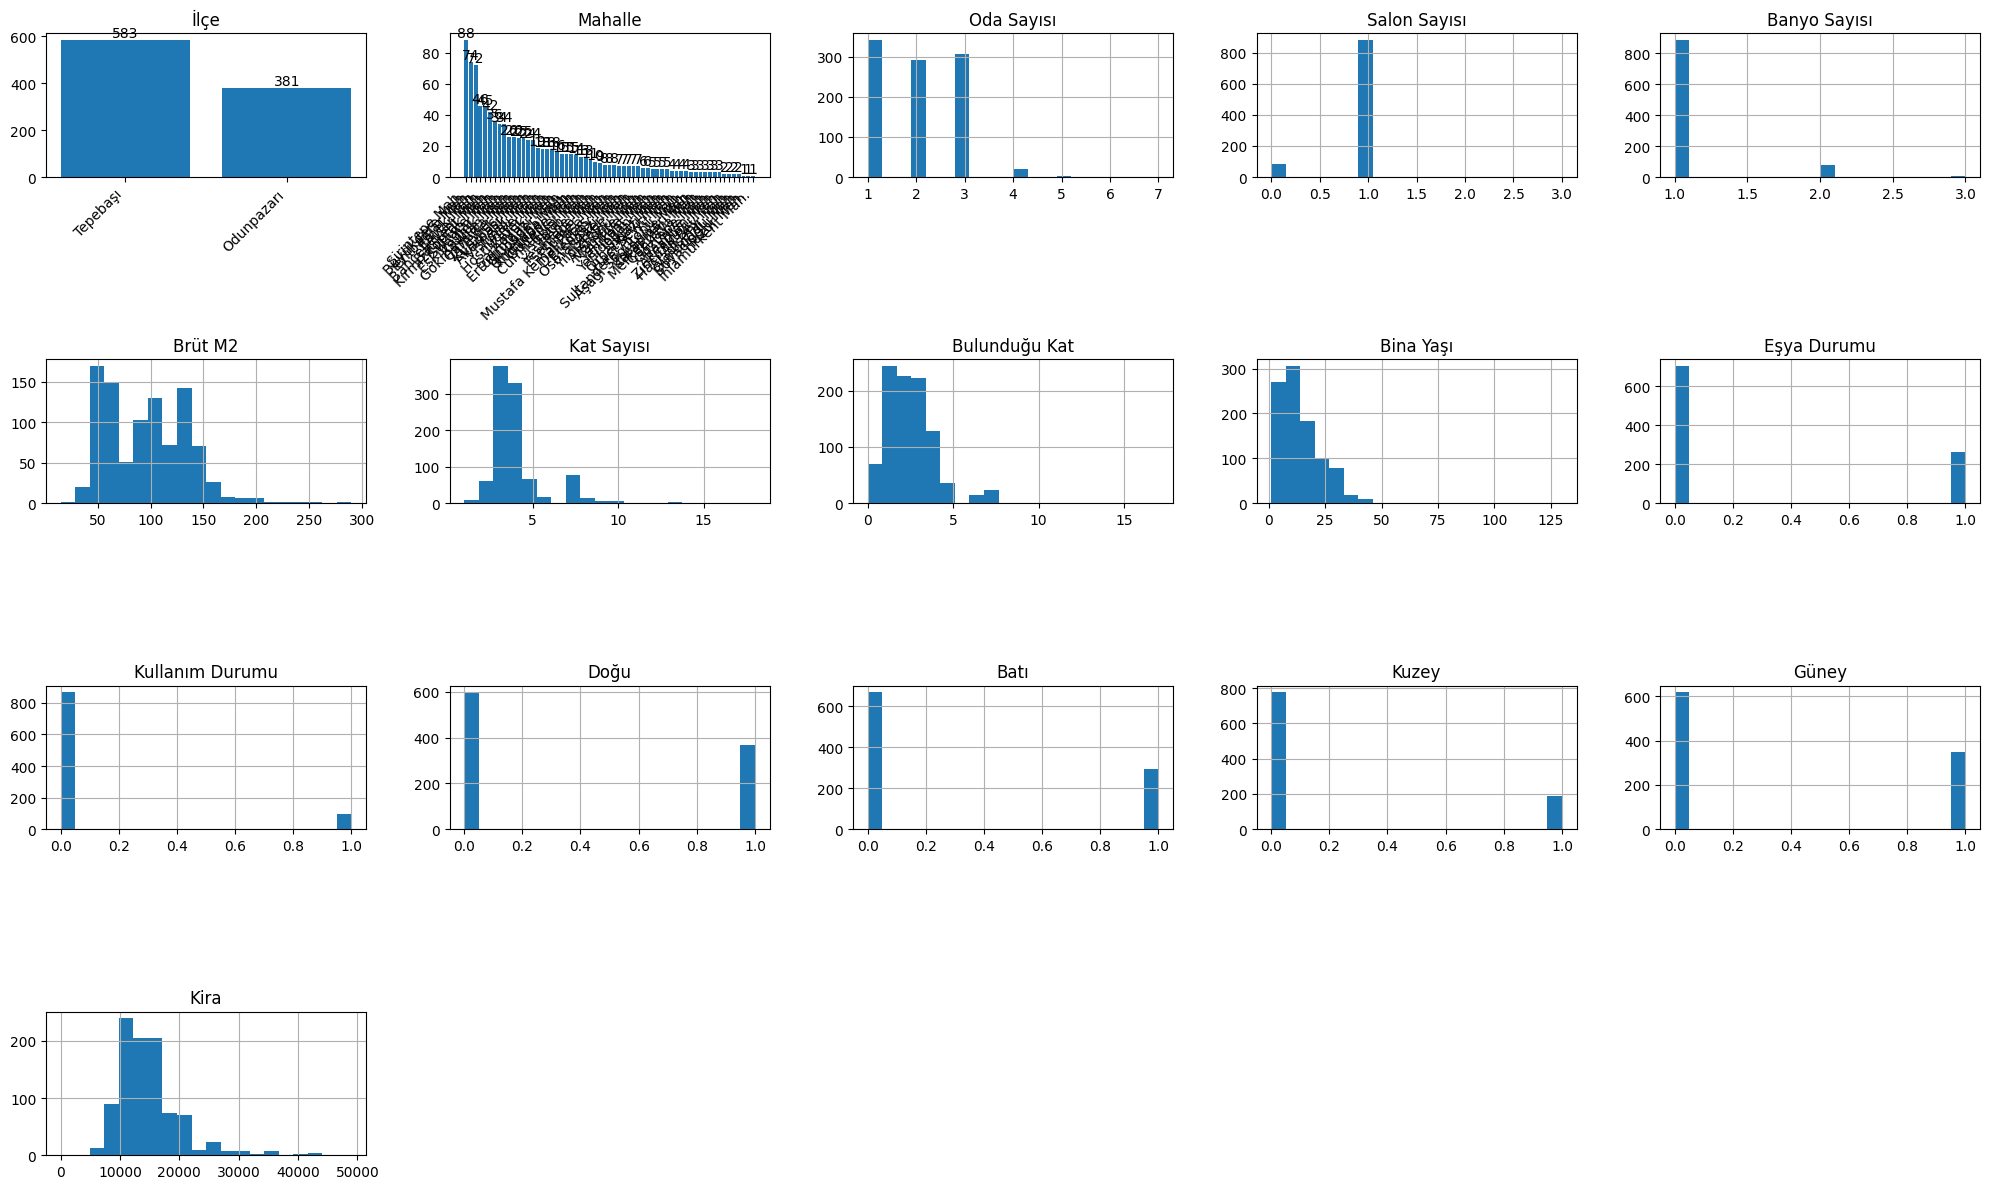

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

for i, col in enumerate(merged_df.columns):
    plt.subplot(4, 5, i + 1)
    if pd.api.types.is_numeric_dtype(merged_df[col]):
        merged_df[col].hist(bins=20)
        plt.title(col)
    else:
        value_counts = merged_df[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.xticks(rotation=45, ha="right")
        plt.title(col)

        for j, v in enumerate(value_counts.values):
            plt.text(j, v, str(v), ha='center', va='bottom')
    plt.tight_layout()

plt.show()

In [ ]:
merged_df["Mahalle"].unique()

array(['Ertuğrulgazi Mah.', 'Şirintepe Mah.', 'Sütlüce Mah.',
       'Batıkent Mah.', 'Emek Mah.', 'Şarhöyük Mah.',
       'Kırmızıtoprak Mah.', 'Çamlıca Mah.', 'Yenibağlar Mah.',
       'Kumlubel Mah.', 'Mamure Mah.', 'Tunalı Mah.', 'Erenköy Mah.',
       'Arifiye Mah.', 'Cumhuriye Mah.', 'Uluönder Mah.', 'Göztepe Mah.',
       'İstiklal Mah.', 'Eskibağlar Mah.', 'Ömerağa Mah.',
       'Kurtuluş Mah.', 'Esentepe Mah.', 'Gökmeydan Mah.',
       'Yenidoğan Mah.', 'Akarbaşı Mah.', '71 Evler Mah.', 'Çankaya Mah.',
       'Bahçelievler Mah.', 'Yenikent Mah.', 'Güllük Mah.',
       'Büyükdere Mah.', 'Hoşnudiye Mah.', 'Vişnelik Mah.', 'Şeker Mah.',
       'Yıldıztepe Mah.', 'Fatih Mah.', 'Mustafa Kemal Paşa Mah.',
       'İhsaniye Mah.', 'Sümer Mah.', 'Osmangazi Mah.', 'Zafer Mah.',
       'Alanönü Mah.', 'Vadişehir Mah.', 'Yeşiltepe Mah.',
       'Deliklitaş Mah.', 'Ihlamurkent Mah.', 'Gültepe Mah.',
       'Hacı Seyit Mah.', 'Hayriye Mah.', 'Zincirlikuyu Mah.',
       'Sultandere 75. Yıl M

In [ ]:
merged_df.head(10)

,İlçe,Mahalle,Oda Sayısı,Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Eşya Durumu,Kullanım Durumu,Doğu,Batı,Kuzey,Güney,Kira
0,Tepebaşı,Ertuğrulgazi Mah.,2,1,1,130,2,2,15,0,0,1,1,0,0,12500
2,Tepebaşı,Şirintepe Mah.,1,1,1,60,3,1,5,0,0,0,0,0,0,9000
4,Tepebaşı,Sütlüce Mah.,1,1,1,50,3,3,4,0,0,0,0,0,0,10000
5,Tepebaşı,Batıkent Mah.,2,1,1,100,3,2,11,0,0,0,0,0,0,15000
6,Tepebaşı,Şirintepe Mah.,1,1,1,60,4,3,11,1,0,0,0,0,0,13000
7,Odunpazarı,Emek Mah.,3,1,2,150,4,3,7,0,0,0,1,1,1,22000
8,Tepebaşı,Şarhöyük Mah.,2,1,1,100,3,1,3,0,0,1,1,0,0,14000
9,Odunpazarı,Kırmızıtoprak Mah.,3,1,1,160,9,7,25,0,0,1,1,0,0,25000
11,Tepebaşı,Çamlıca Mah.,3,1,1,140,3,1,20,0,0,0,0,0,0,20000
12,Tepebaşı,Yenibağlar Mah.,3,1,1,125,7,5,15,0,0,1,0,0,1,22000


In [ ]:
#merged_df.to_csv('FinalDf.csv', index=False)

In [ ]:
merged_df.iloc[900:,:]

,İlçe,Mahalle,Oda Sayısı,Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Eşya Durumu,Kullanım Durumu,Doğu,Batı,Kuzey,Güney,Kira
1296,Tepebaşı,Eskibağlar Mah.,3,0,1,80,3,3,15,0,0,0,0,0,0,16000
1297,Tepebaşı,Uluönder Mah.,2,1,1,90,3,1,16,0,0,0,0,0,0,13500
1298,Tepebaşı,Bahçelievler Mah.,2,0,1,70,3,2,11,0,0,0,0,0,0,13500
1299,Tepebaşı,Zafer Mah.,2,1,1,105,4,4,10,0,1,0,0,0,0,13000
1300,Tepebaşı,Güllük Mah.,3,1,1,130,4,2,30,0,0,0,0,0,0,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Tepebaşı,Şirintepe Mah.,1,1,1,60,3,1,11,1,0,0,0,0,0,9000
1370,Odunpazarı,Büyükdere Mah.,1,1,1,70,3,1,5,1,0,0,0,0,0,13250
1371,Tepebaşı,Sütlüce Mah.,1,1,1,48,3,3,10,1,1,0,0,0,0,9000
1372,Tepebaşı,Ertuğrulgazi Mah.,1,1,1,60,3,1,8,1,0,1,1,0,0,10000


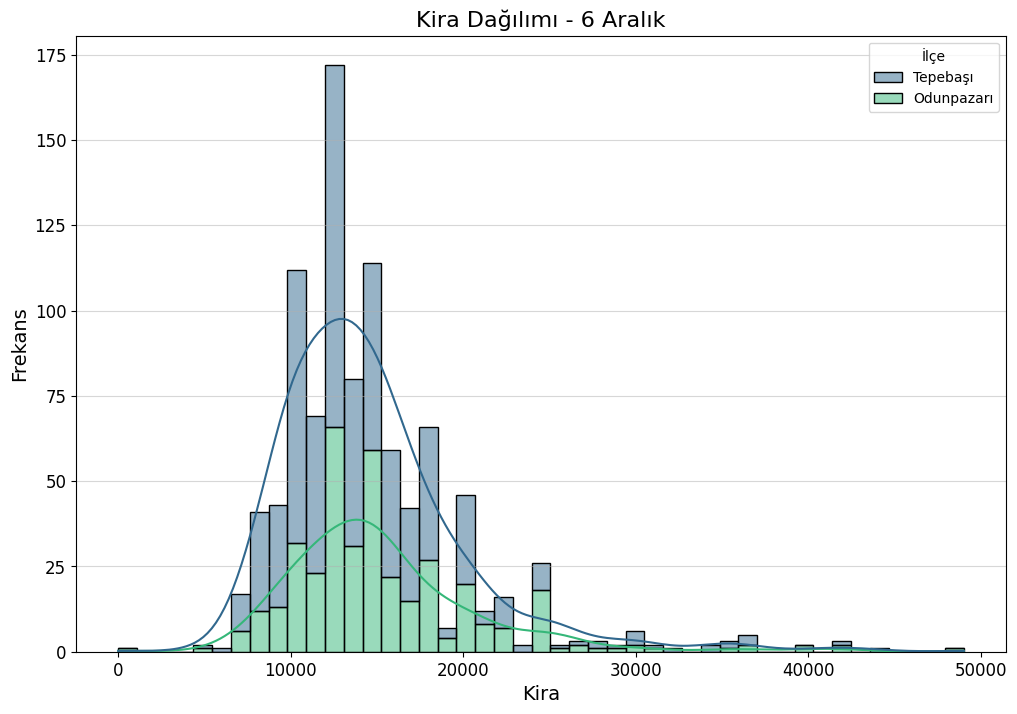

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_5_ilce = merged_df['İlçe'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['İlçe'].isin(top_5_ilce)]
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_df, x='Kira', hue='İlçe', multiple="stack", palette="viridis", kde=True)
plt.title('Kira Dağılımı - 6 Aralık', fontsize=16)
plt.xlabel('Kira', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

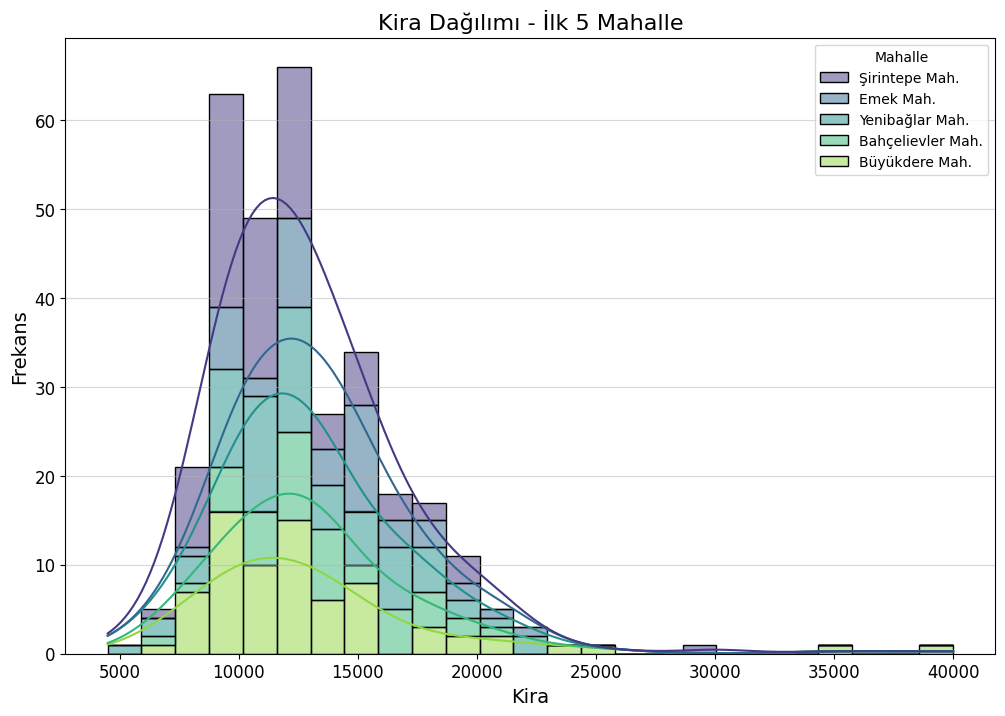

In [ ]:



top_5_mahalle = merged_df['Mahalle'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['Mahalle'].isin(top_5_mahalle)]

plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_df, x='Kira', hue='Mahalle', multiple="stack", palette="viridis", kde=True)
plt.title('Kira Dağılımı - İlk 5 Mahalle', fontsize=16)
plt.xlabel('Kira', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()